In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_cbn_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBN
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.137931
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.137931
2,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
3,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
4,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74996,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74997,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..CBN'], axis = 1)
y = df_rf[['X..CBN']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.13793103],
       [0.13793103],
       [0.13793103],
       ...,
       [0.10344828],
       [0.10344828],
       [0.10344828]])

<AxesSubplot:ylabel='Count'>

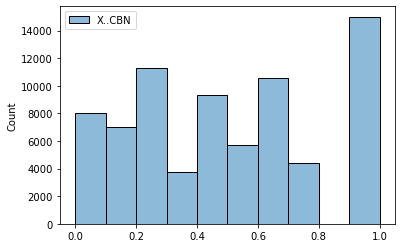

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_13315/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03595344593426628

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.006721150405678469

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08198262258356016

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9851591179650917

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.931891422491503

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.094124
1,lsa_1,0.079143
2,lsa_2,0.087327
3,lsa_3,0.077865
4,lsa_4,0.099736
...,...,...
81,tree,0.000564
82,tropical,0.001028
83,vanilla,0.003044
84,violet,0.000118


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
45,cheese,2.342905e-01
4,lsa_4,9.973602e-02
0,lsa_0,9.412358e-02
2,lsa_2,8.732748e-02
1,lsa_1,7.914332e-02
3,lsa_3,7.786459e-02
7,sativa,4.799625e-02
43,blueberry,2.304788e-02
50,diesel,2.018805e-02
5,hybrid,1.987787e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([9.32835944e-02, 8.04678068e-02, 8.70783828e-02, 7.66786039e-02,
       1.00188715e-01, 2.00664784e-02, 4.01845277e-03, 4.78342419e-02,
       1.60958335e-04, 1.80140194e-03, 2.88334215e-03, 2.59019026e-09,
       5.78448936e-03, 1.84461914e-04, 3.11838019e-03, 2.57492941e-03,
       6.38917886e-03, 3.92607434e-03, 5.79223996e-11, 7.77338999e-03,
       8.53318136e-09, 2.25677277e-09, 5.48428269e-03, 6.63386822e-03,
       6.62368418e-03, 2.44358255e-03, 4.64559409e-03, 1.89496379e-04,
       7.31761041e-09, 1.33394541e-03, 6.45452867e-03, 3.47550276e-09,
       4.23529723e-03, 0.00000000e+00, 2.38278278e-07, 3.74865157e-03,
       3.91175146e-03, 9.84688918e-03, 3.14666380e-04, 1.61552761e-02,
       1.57825687e-04, 9.01983029e-03, 1.11054390e-04, 2.29605540e-02,
       1.47754621e-03, 2.34216159e-01, 7.25897867e-04, 1.53809351e-04,
       1.04659947e-02, 1.12856763e-03, 2.03209820e-02, 5.02842740e-03,
       3.31537510e-03, 6.78726215e-04, 2.94100307e-03, 1.27679184e-03,
      

In [23]:
selector.threshold_

0.01162790697674419

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,apple,blueberry,cheese,diesel,orange
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
2,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
3,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
4,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0,0,0
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0
74997,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_cbn.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_cbn.pkl")

['selected_X_rf_lsa_elbow_cbn.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_13315/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03913622007801573

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.007348886878056696

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08572564889259629

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9782333731247622

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9250062033272413

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_cbn.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_cbn.pkl")

['rscv_rf_lsa_elbow_best_params_cbn.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_13315/2143269374.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03834063659540392

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.006756811756765835

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08219982820399221

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9789343830110983

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9310482015234126

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_cbn.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_cbn.pkl")

['y_test_rfreg_lsa_elbow_cbn.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.03713759638076267

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.00671280401213635

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.08193170333964961

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.931977788490517

Error analysis

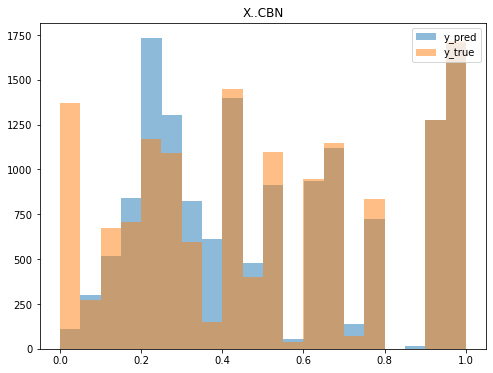

<Figure size 432x288 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBN"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_cbn.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.968
P-value: 0.000


<AxesSubplot:>

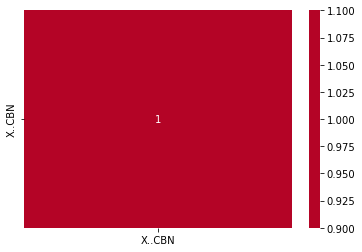

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)